## Project - FMCG

New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.

The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables.
Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance.

Implementation:
1) Read the data file and check for any missing values

2) Change the headers to country and year accordingly.

3) Cleanse the data if required and remove null or blank values

4) After the EDA part is done, try to think which algorithm should be applied here.

5) As we need to make this across years we need to apply PCA first.

6) Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.

7) Plot elbow chart or scree plot to find out optimal number of clusters.

8) Then try to apply K means, Hierarchical clustering and showcase the results.

9) You can either choose to group the countries based on years of data or using the principal components.

10) Then see which countries are consistent and which are largest importers of the good based on scale and position of cluster.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Read the data file and check for any missing values

In [3]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\Projects\Project_Data_1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    object
 2   1991                    207 non-null    object
 3   1992                    207 non-null    object
 4   1993                    207 non-null    object
 5   1994                    207 non-null    object
 6   1995                    207 non-null    object
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

In [13]:
df = df.replace(',','', regex=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  207 non-null    object
 1   1990     207 non-null    object
 2   1991     207 non-null    object
 3   1992     207 non-null    object
 4   1993     207 non-null    object
 5   1994     207 non-null    object
 6   1995     207 non-null    object
 7   1996     207 non-null    int64 
 8   1997     207 non-null    int64 
 9   1998     207 non-null    int64 
 10  1999     207 non-null    int64 
 11  2000     207 non-null    int64 
 12  2001     207 non-null    int64 
 13  2002     207 non-null    int64 
 14  2003     207 non-null    int64 
 15  2004     207 non-null    object
 16  2005     207 non-null    object
 17  2006     207 non-null    object
 18  2007     207 non-null    object
dtypes: int64(8), object(11)
memory usage: 30.9+ KB


In [15]:
convert_dict = {'1990' : int, '1991' : int, '1992' : int, '1993' : int, '1994' : int, '1995' : int, '2004' : int, '2005' : int, '2006' : int, '2007' : int}

df = df.astype(convert_dict) 
print(df.dtypes)

Country    object
1990        int32
1991        int32
1992        int32
1993        int32
1994        int32
1995        int32
1996        int64
1997        int64
1998        int64
1999        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004        int32
2005        int32
2006        int32
2007        int32
dtype: object


In [16]:
df.isna().sum()

# no null values in the provided data.

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

In [17]:
print(df.shape)
df.head()

(207, 19)


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


2) Change the headers to country and year accordingly.

In [18]:
df.columns = ['Country', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007']

In [19]:
df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


3) Cleanse the data if required and remove null or blank values

There is no null values in the data

In [20]:
df.isna().sum()

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

In [21]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


4) After the EDA part is done, try to think which algorithm should be applied here.
5) As we need to make this across years we need to apply PCA first.

In [27]:
x = df.iloc[:,1:].values
c = df.iloc[:,:1].values

In [22]:
# post applying PCA, will apply both Kmeans and and look at silhoutte score. If its good we can go with kmeans.

from sklearn.decomposition import PCA

6) Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.

In [28]:
pca = PCA(n_components=None)
x = pca.fit_transform(x)

In [29]:
pca.explained_variance_ratio_

array([9.18087891e-01, 6.05560009e-02, 1.08051220e-02, 2.39047545e-03,
       2.19038229e-03, 1.64732996e-03, 1.19502740e-03, 7.97856744e-04,
       6.35817920e-04, 4.61460559e-04, 3.20989293e-04, 2.66657191e-04,
       2.42807240e-04, 1.56998807e-04, 1.08464204e-04, 7.07768488e-05,
       4.20518883e-05, 2.38906112e-05])

In [30]:
#from explained variance ratio 1st variable contains 91.8% of the information

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,732.215864,203.381494,-91.386254,4.101273,0.874719,0.275762,-3.142209,-12.810095,-12.514548,3.084263,-14.719925,-5.839982,-5.838940,7.929728,-3.966920,2.497571,-3.920773,0.206654
1,-613.296510,4.715978,3.723620,-5.497663,1.970405,-1.057776,-4.334214,1.633313,-1.162976,2.720540,-1.520743,-0.103493,-0.798261,-0.345024,0.731178,2.700573,-0.712622,0.353582
2,-569.303713,-36.837051,22.974094,-7.077382,-2.342223,1.695158,1.561880,5.413996,0.339645,1.198487,0.695673,-0.318449,0.850217,0.278871,0.863830,0.123622,1.349283,0.009020
3,-717.082766,5.464696,28.897037,-12.102115,-3.826874,4.185596,-1.302431,-5.457357,-5.949502,-4.693130,2.014447,7.743516,-12.121444,-23.631555,-0.270984,6.117575,0.929494,6.367063
4,-661.802241,11.037736,26.829058,-4.721499,-0.923666,4.200434,0.199829,4.955191,-0.550326,0.346655,-1.690722,-0.718153,0.678574,1.141733,-0.883410,-1.386651,-0.485798,-0.634480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-231.395787,123.076993,-3.670796,205.166799,8.359058,50.234187,61.091100,-111.614055,-81.261006,106.630245,130.337523,69.478881,3.278603,23.932691,-17.574498,-11.577597,-2.951267,-7.950805
203,-585.225414,14.463482,15.554855,-4.235566,-0.240974,0.673923,-2.050134,5.221590,-2.332248,0.850916,-1.691483,-0.661360,0.503520,1.452266,0.335004,-0.258312,0.215416,-0.889734
204,59.256311,177.536948,2.828307,2.757493,-6.950651,-20.596663,5.244978,14.974251,-3.443525,3.644107,-7.199077,-6.901787,-1.619559,2.929226,-3.560201,0.359692,-1.276769,-3.702018
205,1488.318012,-15.246686,-400.575028,-29.581610,86.940637,-24.344326,-97.174838,38.178982,24.886382,-15.642597,20.348538,14.051985,22.052111,-12.563356,-6.183521,-6.813225,-1.015097,-4.649007


In [32]:
pca = PCA(n_components=1)

x = pca.fit_transform(x)

In [33]:
x

array([[ 732.21586404],
       [-613.29651041],
       [-569.30371329],
       [-717.08276584],
       [-661.80224146],
       [ 990.536338  ],
       [-618.89116938],
       [-723.65679574],
       [-508.24415824],
       [-454.55205993],
       [-742.57540826],
       [-715.90680645],
       [-410.21526645],
       [-553.23792966],
       [-443.48051568],
       [1422.80060305],
       [-747.39348209],
       [-432.63157145],
       [-715.77955235],
       [-565.11100331],
       [-208.23740784],
       [-738.45278172],
       [1742.70924874],
       [ 369.73996956],
       [-337.63313916],
       [1124.62370598],
       [-394.47756005],
       [-679.0564599 ],
       [-418.46270816],
       [-544.87490201],
       [ 536.37407169],
       [1125.81469646],
       [2538.95325751],
       [ 120.28109569],
       [-748.1254581 ],
       [ 814.52992597],
       [-739.38779128],
       [1003.71773871],
       [ 940.9922227 ],
       [-662.22820165],
       [ 376.48733624],
       [-491.294

7) Plot elbow chart or scree plot to find out optimal number of clusters.

In [34]:
# to apply kmeans using elbow mehod to fix number of clusters

elbow = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

In [35]:
print(elbow)

[149912815.84633195, 32021073.12291728, 15491041.08311579, 10779437.666742675, 7062423.738269063, 4462950.292717814, 3231416.5808064872, 2238856.511861451, 1698923.4752274205, 1349296.4348575578]


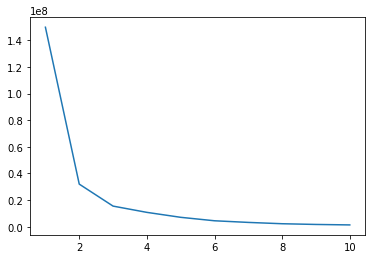

In [36]:
plt.plot(range(1,11), elbow)

In [37]:
#fixing number od clusters as 4

8) Then try to apply K means, Hierarchical clustering and showcase the results.

9) You can either choose to group the countries based on years of data or using the principal components.

In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [39]:
y_kmeans

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 3, 0, 1, 0, 0, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 3,
       0, 2, 0, 2, 0, 0, 3, 0, 1, 0, 0, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 3,
       1, 0, 3, 0, 0, 1, 0, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 3, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 1, 1])

In [49]:
grouped_df_kmeans = pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)
grouped_df_kmeans

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,0
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,1
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25,0
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31,0
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130,3
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,1


In [51]:
grouped_df_kmeans.columns = ['Country',    '1990',    '1991',    '1992',    '1993',    '1994',
          '1995',    '1996',    '1997',    '1998',    '1999',    '2000',
          '2001',    '2002',    '2003',    '2004',    '2005',    '2006',
          '2007',         'Group']

In [52]:
grouped_df_kmeans

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Group
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,1
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25,0
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31,0
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130,3
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,1


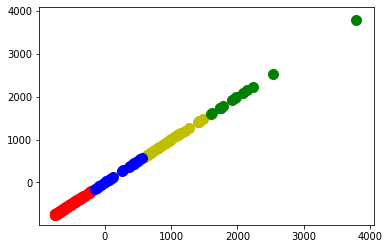

In [48]:
# plotting the grouping

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 0], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 0], s=100, c='y')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 0], s=100, c='g')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 0], s=100, c='b')

In [53]:
# how good is the grouping

from sklearn.metrics import silhouette_score

In [55]:
silhouette_score(x, y_kmeans)

0.6609266958638003

In [56]:
#silhouette score is more towards 1. so the grouping is better and can be considered.

10) Then see which countries are consistent and which are largest importers of the good based on scale and position of cluster.

In [66]:
grouped_df_kmeans['total'] = grouped_df_kmeans.sum(axis=1)

summary = grouped_df_kmeans.groupby(['Group']).agg({'Country':'count', 'total':'sum'})
summary

,Country,total
Group,,
0,129,339279
1,40,886371
2,14,503772
3,24,298674


In [67]:
summary['avg_per_country'] = summary['total']/summary['Country']
summary

,Country,total,avg_per_country
Group,,,
0,129,339279,2630.069767
1,40,886371,22159.275000
2,14,503772,35983.714286
3,24,298674,12444.750000


In [69]:
grouped_df_kmeans[grouped_df_kmeans['Group']==2].head(10)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,Group,total
22,Bhutan,924,862,804,750,699,651,620,597,551,...,515,512,472,460,443,412,406,363,2,31743
32,Cambodia,928,905,881,858,836,811,810,789,777,...,758,750,728,712,696,676,672,664,2,42051
51,Korea Dem. Rep.,841,828,815,802,788,775,775,775,775,...,713,650,577,527,499,508,500,441,2,37083
54,Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,...,761,775,932,960,1034,1046,1093,1104,2,57471
96,Kiribati,1026,1006,986,966,947,928,910,853,571,...,546,607,587,477,439,419,405,423,2,37962
111,Mali,640,631,621,609,597,583,573,566,565,...,571,573,572,578,584,589,593,599,2,31839
113,Mauritania,585,587,590,592,594,595,622,615,612,...,619,624,632,642,494,565,556,559,2,32100
123,Namibia,650,685,687,683,671,658,387,395,411,...,481,506,544,560,572,570,556,532,2,29976
143,Philippines,799,783,766,750,735,719,705,689,669,...,600,578,561,542,534,520,505,500,2,34818
162,Sierra Leone,465,479,492,504,517,534,525,565,602,...,675,696,743,784,830,866,902,941,2,35274


In [68]:
grouped_df_kmeans[grouped_df_kmeans['Group']==1].head(10)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,Group,total
0,Afghanistan,436,429,422,415,407,397,397,387,374,...,346,326,304,308,283,267,251,238,1,19083
5,Angola,514,514,513,512,510,508,512,363,414,...,530,335,307,281,318,331,302,294,1,22329
15,Bangladesh,639,623,608,594,579,576,550,535,516,...,500,491,478,458,444,416,392,387,1,27837
25,Botswana,344,355,351,349,347,349,336,349,371,...,445,497,535,586,598,599,621,622,1,24204
31,Burundi,288,302,292,293,305,322,339,346,424,...,455,522,581,619,639,654,657,647,1,24294
35,Cape Verde,449,438,428,418,408,398,394,391,387,...,380,283,374,370,367,278,285,280,1,20139
37,Central African Republic,318,336,342,350,356,365,270,395,419,...,485,495,468,566,574,507,437,425,1,22674
38,Chad,251,272,282,294,304,315,354,408,433,...,420,450,502,573,548,518,505,497,1,21951
43,Congo Rep.,209,222,231,243,255,269,424,457,367,...,313,354,402,509,477,482,511,485,1,20268
50,Cote d'Ivoire,292,304,306,309,312,319,329,350,376,...,472,571,561,590,604,613,597,582,1,23703


### 14 countries in Group-2 is the highest contributing, followed by 1 out of groups 0,1,2 & 3.

###### Applying Hierarchical clustering

In [71]:
# applying dendrogram to check best number of clusters

import  scipy.cluster.hierarchy as sch

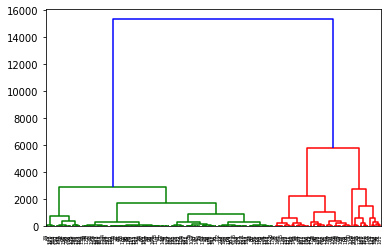

In [72]:
dendro = sch.dendrogram(sch.linkage(x, method='ward'))

In [73]:
#fixing number of clusters as 4

In [74]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [75]:
y_hc

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 3, 1, 2, 1, 2, 2, 1, 2, 1, 3, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 3, 3, 1, 1, 2, 3, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 2, 0, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3,
       1, 0, 1, 0, 1, 1, 3, 1, 2, 1, 1, 2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 3, 1, 1, 2, 3, 1, 2, 1, 2, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 3, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 2, 3, 1, 3, 0, 0], dtype=int64)

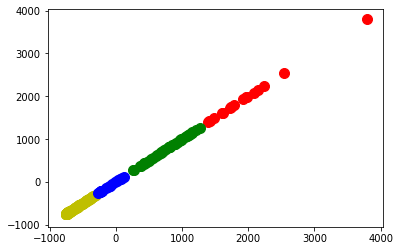

In [76]:
# plotting the grouping

plt.scatter(x[y_hc==0, 0], x[y_hc==0, 0], s=100, c='r')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 0], s=100, c='y')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 0], s=100, c='g')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 0], s=100, c='b')

In [77]:
silhouette_score(x, y_hc)

0.6067954990867921

### Considering silhouette_score KMeans clustering is better.